## Update Showcase Chart

In [4]:
import yfinance as yf

from pathlib import Path

from mplchart.chart import Chart

from mplchart.primitives import Candlesticks, Volume
from mplchart.indicators import SMA, EMA, RSI, MACD

from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats("svg")

ROOT = Path.cwd().parent

In [5]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-06-04 00:00:00-04:00,42.329163,43.388357,42.107191,43.342514,123872000,0.0,0.0
2019-06-05 00:00:00-04:00,44.462032,44.633338,43.704431,44.042213,119093600,0.0,0.0
2019-06-06 00:00:00-04:00,44.172497,44.749142,43.948110,44.688824,90105200,0.0,0.0
2019-06-07 00:00:00-04:00,45.000065,46.305360,44.821525,45.878304,122737600,0.0,0.0
2019-06-10 00:00:00-04:00,46.278833,47.137769,46.232990,46.464615,104883600,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-29 00:00:00-04:00,189.610001,192.250000,189.509995,190.289993,53068000,0.0,0.0
2024-05-30 00:00:00-04:00,190.759995,192.179993,190.630005,191.289993,49947900,0.0,0.0
2024-05-31 00:00:00-04:00,191.440002,192.570007,189.910004,192.250000,75158300,0.0,0.0


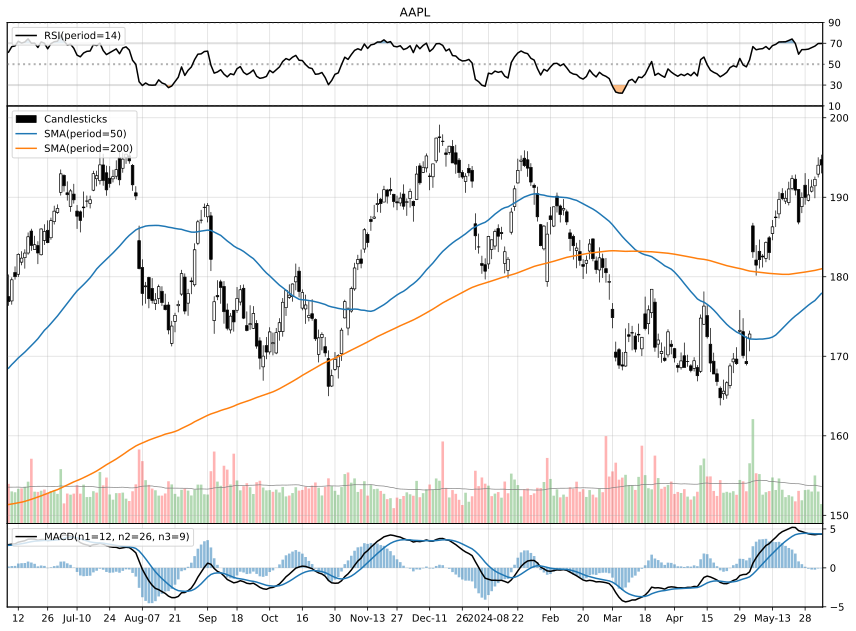

In [7]:
max_bars = 250

indicators = [
    Candlesticks(use_bars=False),
    SMA(50),
    SMA(200),
    Volume(),
    RSI(),
    MACD()
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)

In [8]:
showcase = ROOT.joinpath("output/showcase.svg")

data = chart.render("svg")

print(f"Updating {showcase.name} ...")

showcase.write_bytes(data)

Updating showcase.svg ...


287783